# Stroke Predictor Model (SPM)

#### this link about Stroke factors with deatails we help to understand analysis 

###### https://www.betterhealth.vic.gov.au/health/ConditionsAndTreatments/stroke-risk-factors-and-prevention 



###  Firstly we will use our data from kaggle to create our model so we will have to do some steps 

   ##### 1-  Import libs 
   ##### 2-  Analysis our data 
   ##### 3- Visullization for the data 
   ##### 4-  Data preprocessing 
   ##### 5-  Machine learning Model 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, fbeta_score, make_scorer
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

###### we will use "Health _Stroke " as our Data frame to deal with it 

In [4]:
Health_Stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")

##### here we will use .shape func to get the no. of raws and couloums 

In [5]:
Health_Stroke.shape

(5110, 12)

##### we will use.info() func to get information about the Dataset 

In [42]:
Health_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.5+ KB


##### we will use .describe()  func to get  statistical information about the Dataset 

In [44]:
Health_Stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,37060.423594,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,20995.468407,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,18602.500000,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,37580.500000,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,55181.750000,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


##### we will use .isnull().sum()  func to know the missing data in the Dataset 


In [8]:
Health_Stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### here we will use dropna() func to remove missing values 

In [45]:
Health_Stroke.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##### we will the new data without the NAN values in new Data fram

Health_Stroke= Health_Stroke.dropna()

In [11]:
Health_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


# Data Analysis

##### we will use value_counts() to get info of each coulums

In [12]:
Health_Stroke["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

##### here we will use this code line to drop the other in the gender coloum as its not important 

In [13]:
Health_Stroke= Health_Stroke[Health_Stroke["gender"] != "Other"]
Health_Stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### here we will get the mean of the age coloum to use its in analysis 

In [21]:
Health_Stroke["age"].value_counts().mean()

47.19230769230769

In [46]:
Health_Stroke["age"].unique()

array([6.70e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01, 7.40e+01,
       6.90e+01, 7.80e+01, 6.10e+01, 5.40e+01, 5.00e+01, 6.40e+01,
       7.50e+01, 6.00e+01, 7.10e+01, 5.20e+01, 8.20e+01, 6.50e+01,
       5.70e+01, 4.20e+01, 4.80e+01, 7.20e+01, 5.80e+01, 7.60e+01,
       3.90e+01, 7.70e+01, 6.30e+01, 7.30e+01, 5.60e+01, 4.50e+01,
       7.00e+01, 5.90e+01, 6.60e+01, 4.30e+01, 6.80e+01, 4.70e+01,
       5.30e+01, 3.80e+01, 5.50e+01, 4.60e+01, 3.20e+01, 5.10e+01,
       1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01, 3.50e+01,
       2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01, 1.70e+01,
       1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01, 2.90e+01,
       1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01, 3.60e+01,
       6.40e-01, 3.40e+01, 4.10e+01, 8.80e-01, 5.00e+00, 2.60e+01,
       3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00, 9.00e+00,
       1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01, 1.08e+00,
       1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e+00, 1.72e

In [22]:
Health_Stroke["hypertension"].value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

In [23]:
Health_Stroke["heart_disease"].value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

In [24]:
Health_Stroke["ever_married"].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [25]:
Health_Stroke["work_type"].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [78]:
Health_Stroke["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [26]:
Health_Stroke["Residence_type"].value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

In [79]:
Health_Stroke["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [27]:
Health_Stroke["avg_glucose_level"].value_counts()

93.88     6
91.68     5
83.16     5
91.85     5
73.00     5
         ..
181.30    1
122.41    1
239.64    1
148.24    1
75.62     1
Name: avg_glucose_level, Length: 3851, dtype: int64

In [82]:
Health_Stroke["avg_glucose_level"].unique()

array([228.69, 105.92, 171.23, ...,  82.99, 166.29,  85.28])

In [28]:
Health_Stroke["bmi"].value_counts()

28.7    41
28.4    38
26.1    37
26.7    37
27.7    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [29]:
Health_Stroke["smoking_status"].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [47]:
Health_Stroke["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [21]:
Health_Stroke["stroke"].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

# Data visualization

##### here we will use displot to show graph for the age coloum  as we see here the most age in counts ( between 0-20 , 40 , 80)

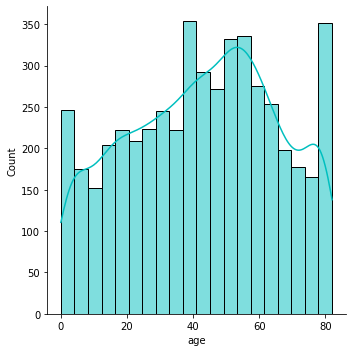

In [51]:
sns.displot(Health_Stroke['age'],  kde= True, color="c")

##### in this graph we see the most counts of people dont have a hypertension as no = zero , yes= One 

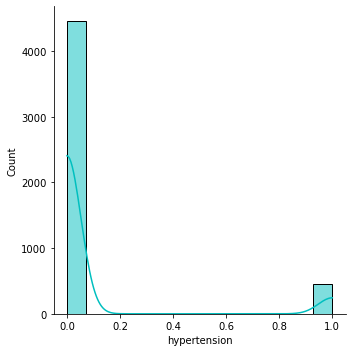

In [23]:
sns.displot(Health_Stroke['hypertension'], kde= True , color='c')

##### in this graph we see the most counts of people dont have a heart_disease as no = zero , yes= One 

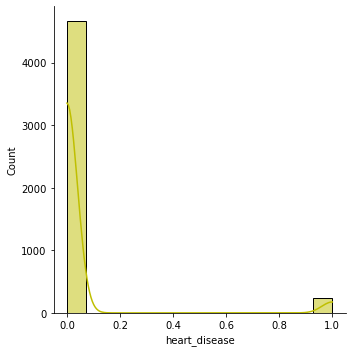

In [24]:
sns.displot(Health_Stroke['heart_disease'] , kde= True , color = 'y')

##### in this graph we see the most counts of people dont have a avg_glucose_level as we see the data between 50 and 100 has the most counts in our data 

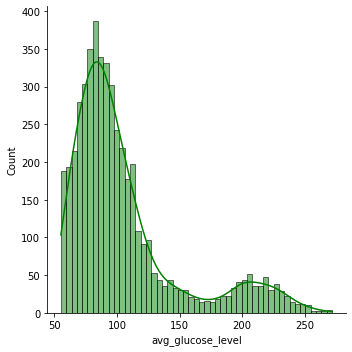

In [49]:
sns.displot(Health_Stroke['avg_glucose_level'] , kde= True ,  color='g')

##### in this graph we see the most counts of people dont have  bmi as we see the data between 20 and 40 has the most counts in our data 


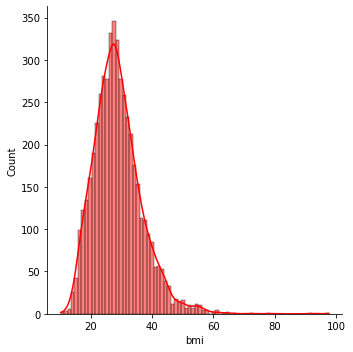

In [50]:
sns.displot(Health_Stroke['bmi'] , kde= True , color = 'r')

##### in this graph we see the most counts of people dont have Stroke as we see the data for no stroke people is more than the stroke people


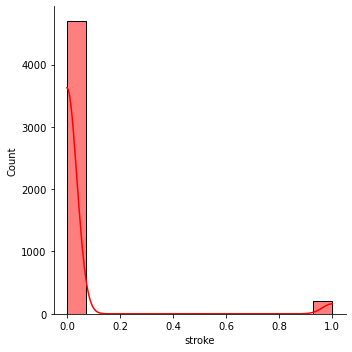

In [27]:
sns.displot(Health_Stroke['stroke'] ,kde= True , color = 'r')

##### in this graph we plot a graph between the gender and stroke to see wich gender has a more stroke and as we see in non stroke the female is greater than male and in stroke the female is greater than male too 

<AxesSubplot:xlabel='stroke', ylabel='count'>

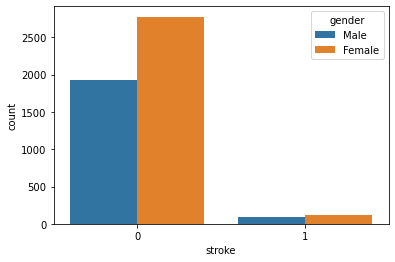

In [28]:
sns.countplot(x = 'stroke', hue = 'gender', data = Health_Stroke)

##### in this graph we plot a graph between the people who have heart disease and stroke so in greaph we see the number of people with no heart disease and no stroke is greater than the people who have a no heart disease but have stroke  
##### we have a surprise here there are people with no heart dusease and have a stroke greater than the people who have a heart disease and have a stroke 

<AxesSubplot:xlabel='stroke', ylabel='count'>

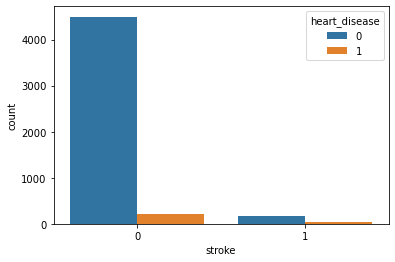

In [29]:
sns.countplot(x = 'stroke', hue = 'heart_disease', data = Health_Stroke)

##### in this graph we plot a gender and heart disease as we see the number of female who dosent have a heart disease is greater than male 

<AxesSubplot:xlabel='gender', ylabel='count'>

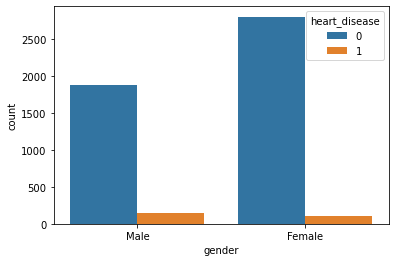

In [53]:
sns.countplot(x = 'gender', hue = 'heart_disease', data = Health_Stroke)

##### in this graph we see the number female who dosent  has hypertension  greater than males and  the numbers of females who have a hypertension is greater than males too 

<AxesSubplot:xlabel='gender', ylabel='count'>

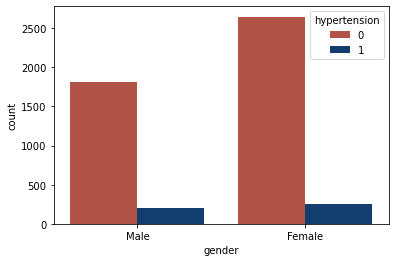

In [77]:
sns.countplot(x = 'gender', hue = 'hypertension', data = Health_Stroke  , palette=['#C44536',"#023E7D"])

##### in this graph we see the numbers of femals and males who live in the Urban and Rural

<AxesSubplot:xlabel='gender', ylabel='count'>

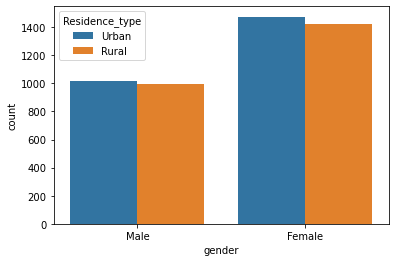

In [56]:
sns.countplot(x = 'gender', hue = 'Residence_type', data = Health_Stroke)

##### in this graph we see the numbers of females and males for the types of smoking 

<AxesSubplot:xlabel='gender', ylabel='count'>

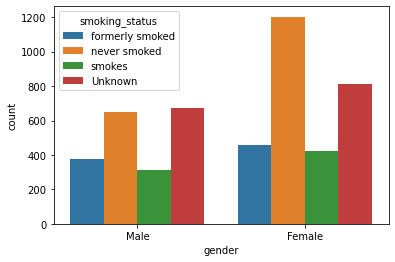

In [57]:
sns.countplot(x = 'gender', hue = 'smoking_status', data = Health_Stroke)

##### in this graph we the numbers of people who have strok their type is private 

<AxesSubplot:xlabel='stroke', ylabel='count'>

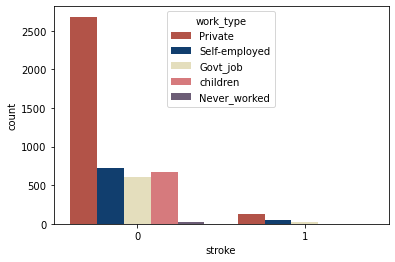

In [75]:
sns.countplot(x = 'stroke', hue = 'work_type', data = Health_Stroke  ,   palette=['#C44536',"#023E7D",'#EAE2B7','#E56B6F','#6D597A'])

##### in this graph we have a surprise that the number of people who have a stroke is never smoked people 

<AxesSubplot:xlabel='stroke', ylabel='count'>

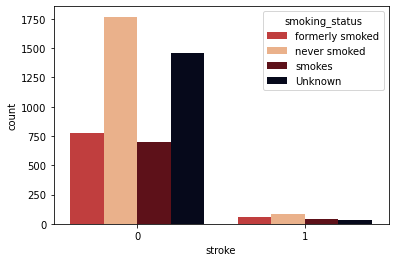

In [76]:
sns.countplot(x = 'stroke', hue = 'smoking_status', data = Health_Stroke , palette=['#D62828',"#FAAE7B","#6A040F", "#03071E"])

##### in this graph we see the the peole who have a heart _ disease have a less stroke 

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

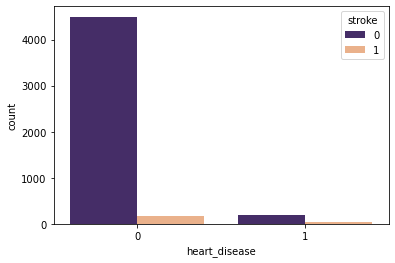

In [68]:
sns.countplot(x = 'heart_disease', hue = 'stroke', data = Health_Stroke ,palette=['#432371',"#FAAE7B"])

## Data Preprocessing

##### here in this line code we used one hot encoding line to change the data of these coloums 

In [31]:
categorical_features = ['gender', 'ever_married', 'work_type']
for categorical_feature in categorical_features:
    one_hot_encoding = pd.get_dummies(Health_Stroke[categorical_feature])
    Health_Stroke = Health_Stroke.drop(categorical_feature, axis = 1)
    Health_Stroke = Health_Stroke.join(one_hot_encoding)

In [32]:
labelencoder = LabelEncoder()
Health_Stroke['smoking_status'] = labelencoder.fit_transform(Health_Stroke['smoking_status'])

##### here we dropped these coloums due to its useless in Our model tarining 

In [33]:
Health_Stroke = Health_Stroke.drop(["id", 'Residence_type'], axis=1)

##### here we will spillt our data to test and target 

In [34]:
features = Health_Stroke.drop("stroke", axis=1)
labels = Health_Stroke["stroke"]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [36]:
under_sampler = RandomUnderSampler(sampling_strategy='majority')
x_train_us, y_train_us = under_sampler.fit_resample(x_train, y_train)

In [37]:
classifier = RandomForestClassifier()

In [ ]:
params = {
 'bootstrap': [True, False],
 'max_depth': [4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 50, 100, 150, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
f2_scorer = make_scorer(fbeta_score, beta=2)
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           cv=10,
                           scoring=f2_scorer, verbose=2, n_jobs=-1)
grid_search.fit(x_train_us, y_train_us)

Fitting 10 folds for each of 12852 candidates, totalling 128520 fits


In [ ]:
grid_search.best_score_

In [40]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 20}

In [41]:
classifier = grid_search.best_estimator_

In [42]:
y_pred =classifier.predict(x_test)

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(581, 360, 8, 33)

In [44]:
len(y_test[y_test == 1])

41

In [45]:
accuracy_score(y_test, y_pred)

0.6252545824847251

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76       941
           1       0.08      0.80      0.15        41

    accuracy                           0.63       982
   macro avg       0.54      0.71      0.46       982
weighted avg       0.95      0.63      0.73       982



In [47]:
fbeta_score(y_test, y_pred, beta=2.0)

0.29622980251346503

### In Our model we play on f2 for medical classification 